#Paquetes necesarios

In [6]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

(0.0, 400.0)

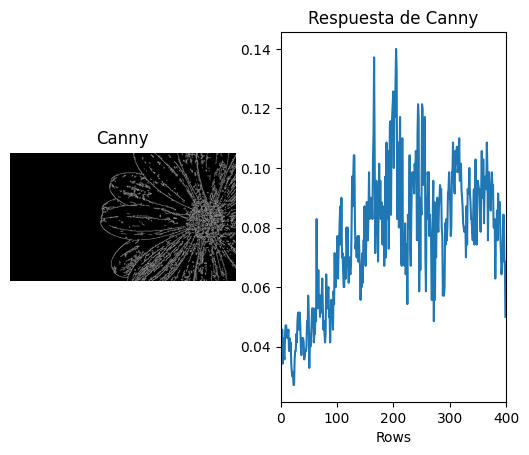

In [2]:
#Lee imagen de archivo
img = cv2.imread('../P2/img_prova_VC.jpg') 

gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)

row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

rows = row_counts[:,0] / (255 * canny.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Rows")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

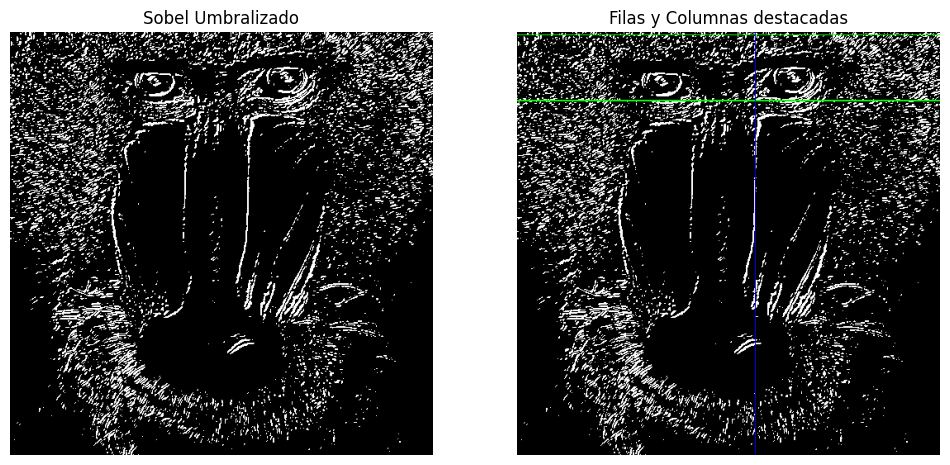

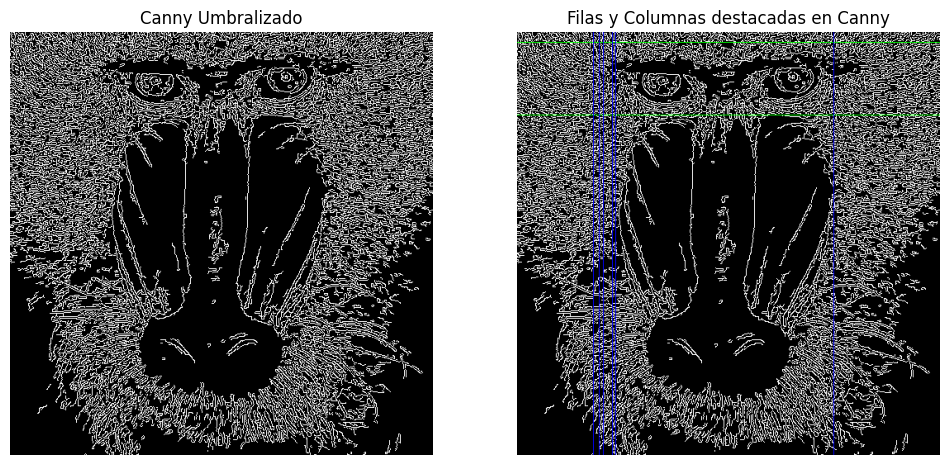

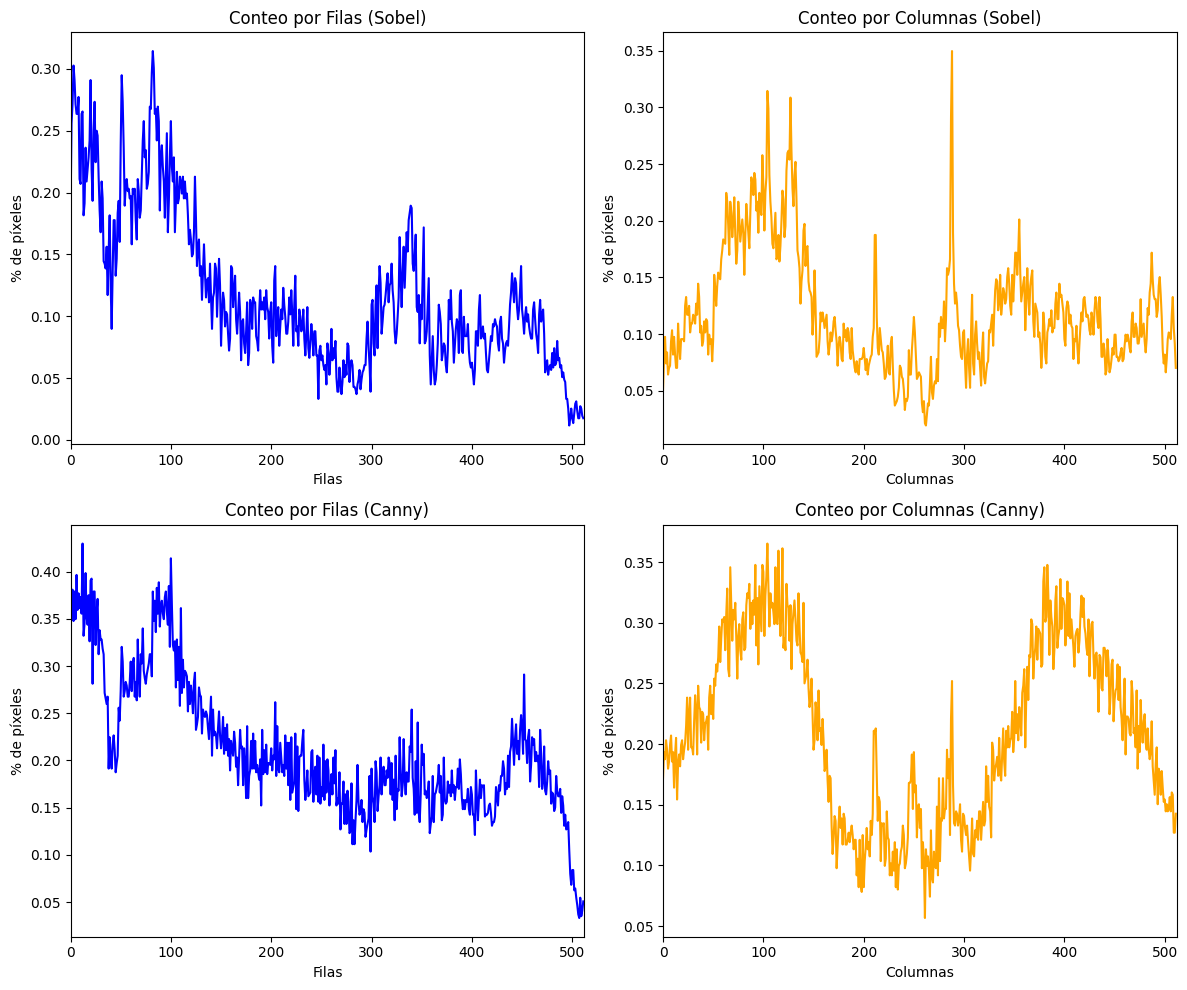

In [5]:
# Lee la imagen de archivo
img = cv2.imread('../P2/mandril.jpg')

# Conversión a escala de grises
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplica filtro Gaussiano para suavizar la imagen
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

# Calcula los bordes con Sobel en X y en Y
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # Sobel en X
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # Sobel en Y

# Combina los resultados de Sobel
sobel = cv2.add(sobelx, sobely)

# Convierte el resultado de Sobel a 8 bits para visualizar
sobel8 = cv2.convertScaleAbs(sobel)

# Aplica umbralizado sobre la imagen de Sobel
valorUmbral = 130  # Puedes ajustar este valor según necesites
_, sobelUmbralizado = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)

# Conteo de píxeles blancos (bordes detectados) por columnas y filas
col_counts = cv2.reduce(sobelUmbralizado, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = cv2.reduce(sobelUmbralizado, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normalización para obtener % de píxeles blancos
cols = col_counts[0] / (255 * sobelUmbralizado.shape[0])
rows = row_counts[:, 0] / (255 * sobelUmbralizado.shape[1])

# Encuentra el valor máximo en filas y columnas
max_col = np.max(cols)
max_row = np.max(rows)

# Encuentra las filas y columnas con más del 95% del valor máximo
filas_significativas = np.where(rows > 0.95 * max_row)[0]
columnas_significativas = np.where(cols > 0.95 * max_col)[0]

# Visualiza los bordes y las filas y columnas destacadas
sobel_color = cv2.cvtColor(sobelUmbralizado, cv2.COLOR_GRAY2BGR)

# Dibuja líneas en las filas significativas
for fila in filas_significativas:
    cv2.line(sobel_color, (0, fila), (sobel_color.shape[1], fila), (0, 255, 0), 1)

# Dibuja líneas en las columnas significativas
for columna in columnas_significativas:
    cv2.line(sobel_color, (columna, 0), (columna, sobel_color.shape[0]), (0, 0, 255), 1)

# Visualiza los resultados de Sobel
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel Umbralizado")
plt.imshow(sobelUmbralizado, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Filas y Columnas destacadas")
plt.imshow(sobel_color)
plt.show()

# Detección de bordes con Canny
canny = cv2.Canny(gris, 100, 200)

# Conteo de píxeles blancos en Canny por filas y columnas
col_counts_canny = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts_canny = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normalización
cols_canny = col_counts_canny[0] / (255 * canny.shape[0])
rows_canny = row_counts_canny[:, 0] / (255 * canny.shape[1])

# Encuentra el valor máximo en filas y columnas para Canny
max_col_canny = np.max(cols_canny)
max_row_canny = np.max(rows_canny)

# Encuentra las filas y columnas con más del 95% del valor máximo para Canny
filas_significativas_canny = np.where(rows_canny > 0.95 * max_row_canny)[0]
columnas_significativas_canny = np.where(cols_canny > 0.95 * max_col_canny)[0]

# Visualiza los bordes y las filas y columnas destacadas para Canny
canny_color = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

# Dibuja líneas en las filas significativas de Canny
for fila in filas_significativas_canny:
    cv2.line(canny_color, (0, fila), (canny_color.shape[1], fila), (0, 255, 0), 1)

# Dibuja líneas en las columnas significativas de Canny
for columna in columnas_significativas_canny:
    cv2.line(canny_color, (columna, 0), (columna, canny_color.shape[0]), (0, 0, 255), 1)

# Visualiza los resultados de Canny
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny Umbralizado")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.axis("off")
plt.title("Filas y Columnas destacadas en Canny")
plt.imshow(canny_color)
plt.show()

# Graficar los histogramas de filas y columnas
plt.figure(figsize=(12, 10))

# Histogramas de Sobel
plt.subplot(2, 2, 1)
plt.title("Conteo por Filas (Sobel)")
plt.xlabel("Filas")
plt.ylabel("% de píxeles")
plt.plot(rows, color='blue')
plt.xlim([0, sobelUmbralizado.shape[0]])

plt.subplot(2, 2, 2)
plt.title("Conteo por Columnas (Sobel)")
plt.xlabel("Columnas")
plt.ylabel("% de píxeles")
plt.plot(cols, color='orange')
plt.xlim([0, sobelUmbralizado.shape[1]])

# Histogramas de Canny
plt.subplot(2, 2, 3)
plt.title("Conteo por Filas (Canny)")
plt.xlabel("Filas")
plt.ylabel("% de píxeles")
plt.plot(rows_canny, color='blue')
plt.xlim([0, canny.shape[0]])

plt.subplot(2, 2, 4)
plt.title("Conteo por Columnas (Canny)")
plt.xlabel("Columnas")
plt.ylabel("% de píxeles")
plt.plot(cols_canny, color='orange')
plt.xlim([0, canny.shape[1]])

plt.tight_layout()
plt.show()



TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [ ]:
# Inizializza la cattura video dalla webcam
vid = cv2.VideoCapture(0)

# Inizializza il sottrattore di fondo
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=True)
myBg = cv2.imread('../P2/img_prova_VC.jpg')

if myBg is None:
    print("Error: error loading image")
    vid.release()
    cv2.destroyAllWindows()

while True:
    
    ret, frame = vid.read()

    if not ret:
        break

    #Eliminazione sfondo
    framem = cv2.flip(frame, 1) #capovolge immagine a specchio
    objetos = eliminadorFondo.apply(framem) 
    
    #creo una maschera 
    _, mask = cv2.threshold(objetos, 190, 255, cv2.THRESH_BINARY)
    maskRev = cv2.bitwise_not(mask) #immagine invertita

    #ridimensionamento immagine
    myBg = cv2.resize(myBg, (frame.shape[1], frame.shape[0]))

    #estraggo gli oggetti in primo piano
    foregr = cv2.bitwise_and(framem, framem, mask=mask)

    #estraggo lo sfondo
    backgr = cv2.bitwise_and(myBg, myBg, mask=maskRev)

    result = cv2.add(foregr, backgr)


    # rilevazione dei bordi

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    edges = cv2.Canny(gray_frame, 50, 100)  # Rilevazione dei bordi

    _, mask2 = cv2.threshold(edges, 1, 255, cv2.THRESH_BINARY)
    maskRev2 = cv2.bitwise_not(mask2)
    foregr2 = cv2.bitwise_and(frame, frame, mask=mask2)
    backgr2 = cv2.bitwise_and(myBg, myBg, mask=maskRev2)
    result2 = cv2.add(foregr2, backgr2)

    
    cv2.imshow('Cámara web original', frame)  
    cv2.imshow('Eliminador fondo', objetos)  
    cv2.imshow('Fondo personalizado', result)
    cv2.imshow('Bordes', edges)  
    cv2.imshow('Canny con fondo personalizado', result2)

    # Esci con il tasto ESC
    if cv2.waitKey(20) == 27:
        break

# Libero l'oggetto di cattura
vid.release()
# Distruggo tutte le finestre
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [8]:
# Cargar el modelo pre-entrenado de detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Inicializar la captura de vídeo
cap = cv2.VideoCapture(0)

while True:
    # Capturar un frame del vídeo
    ret, frame = cap.read()
    if not ret:
        break

    # Convertir a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detectar caras
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    # Aplicar un efecto de pixelado en las caras detectadas
    for (x, y, w, h) in faces:
        # Extraer la región de interés
        face_roi = frame[y:y+h, x:x+w]

        # Aplicar un efecto de pixelado
        face_roi = cv2.resize(face_roi, (16, 16), interpolation=cv2.INTER_LINEAR)
        face_roi = cv2.resize(face_roi, (w, h), interpolation=cv2.INTER_NEAREST)

        # Sustituir la región original con la pixelada
        frame[y:y+h, x:x+w] = face_roi

    # Mostrar el resultado
    cv2.imshow('Video', frame)

    # Salir si se presiona 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la captura y cerrar ventanas
cap.release()
cv2.destroyAllWindows()